In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

C:\Users\cheryl\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv('Dataset_B_Hotel.csv',delimiter=',')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
df.shape

(36275, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     35368 non-null  object 
 6   required_car_parking_space            35005 non-null  float64
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

In [6]:
#split data 
input_df=df.drop('booking_status',axis=1)
output_df=df['booking_status']

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

In [8]:
x_train = x_train.drop(columns=['Booking_ID'])

In [9]:
x_test = x_test.drop(columns=['Booking_ID'])

In [10]:
# EDA
# check null value 
missing_train = x_train.isnull().sum()
missing_train 

no_of_adults                               0
no_of_children                             0
no_of_weekend_nights                       0
no_of_week_nights                          0
type_of_meal_plan                        736
required_car_parking_space              1039
room_type_reserved                         0
lead_time                                  0
arrival_year                               0
arrival_month                              0
arrival_date                               0
market_segment_type                        0
repeated_guest                             0
no_of_previous_cancellations               0
no_of_previous_bookings_not_canceled       0
avg_price_per_room                      1279
no_of_special_requests                     0
dtype: int64

In [11]:
missing_test = x_test.isnull().sum()
missing_test

no_of_adults                              0
no_of_children                            0
no_of_weekend_nights                      0
no_of_week_nights                         0
type_of_meal_plan                       171
required_car_parking_space              231
room_type_reserved                        0
lead_time                                 0
arrival_year                              0
arrival_month                             0
arrival_date                              0
market_segment_type                       0
repeated_guest                            0
no_of_previous_cancellations              0
no_of_previous_bookings_not_canceled      0
avg_price_per_room                      353
no_of_special_requests                    0
dtype: int64

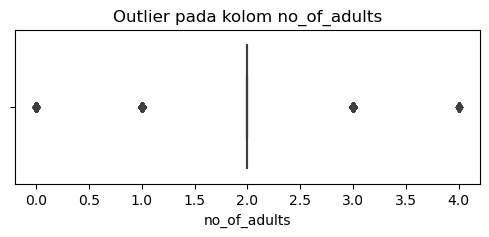

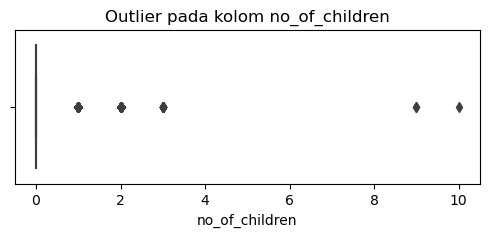

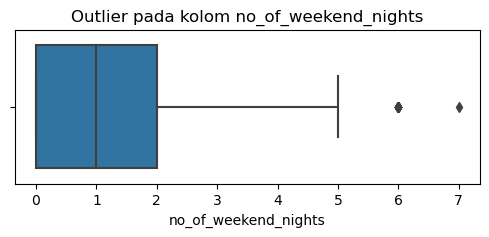

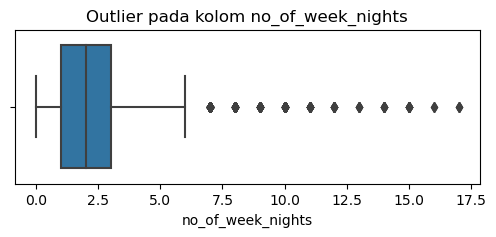

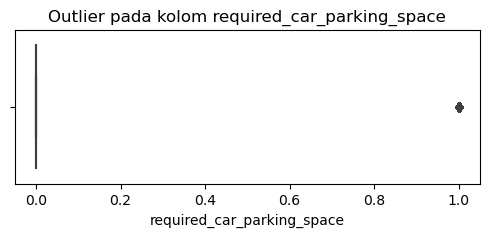

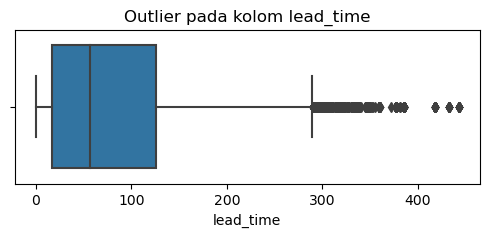

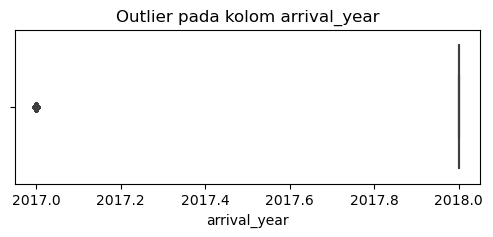

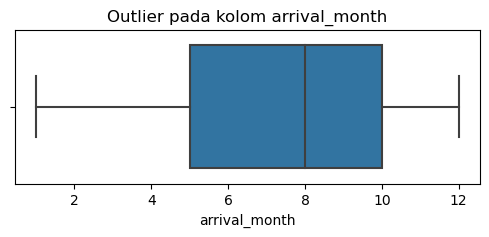

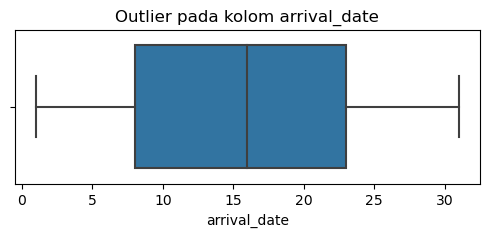

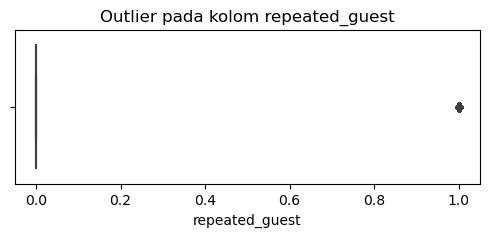

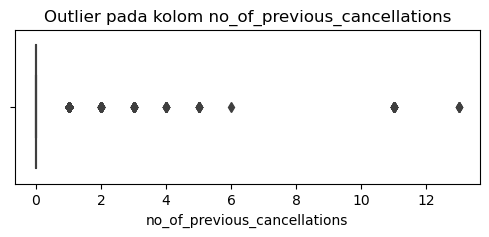

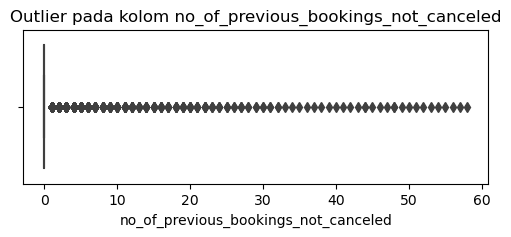

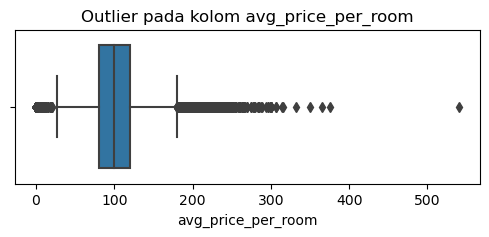

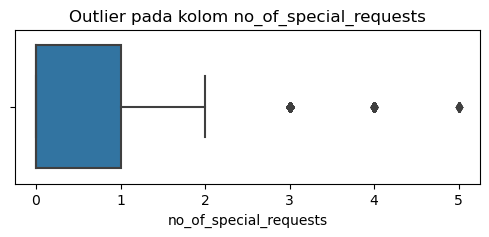

In [12]:
# check outlier
numeric_cols = x_train.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Outlier pada kolom {col}')
    plt.show()

In [13]:
# duplicate data 
train_duplicates = x_train.duplicated().sum()
test_duplicates = x_test.duplicated().sum()

print(f"Duplikat di Train: {train_duplicates}")
print(f"Duplikat di Test: {test_duplicates}")

Duplikat di Train: 6937
Duplikat di Test: 1072


In [14]:
print(df['type_of_meal_plan'].value_counts())

type_of_meal_plan
Meal Plan 1     27157
Not Selected     4986
Meal Plan 2      3220
Meal Plan 3         5
Name: count, dtype: int64


In [15]:
print(df['room_type_reserved'].value_counts())

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64


In [16]:
print(df['market_segment_type'].value_counts())

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64


In [17]:
print(df['booking_status'].value_counts())

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


In [18]:
# pre processing 
# impute missing values for categorical data 
print('mode type of meal plan :',sts.mode(x_train['type_of_meal_plan']))

mode type of meal plan : Meal Plan 1


In [19]:
x_train['type_of_meal_plan'].fillna('Meal Plan 1', inplace=True)
x_test['type_of_meal_plan'].fillna('Meal Plan 1', inplace=True)

In [20]:
# impute missing values for numerical data using median
x_train['required_car_parking_space'].fillna(x_train['required_car_parking_space'].median(), inplace=True)
x_train['avg_price_per_room'].fillna(x_train['avg_price_per_room'].median(), inplace=True)

x_test['required_car_parking_space'].fillna(x_train['required_car_parking_space'].median(), inplace=True)
x_test['avg_price_per_room'].fillna(x_train['avg_price_per_room'].median(), inplace=True)

In [21]:
# drop duplicate data on x and y data
duplicates = x_train.duplicated(keep='first')  
x_train = x_train[~duplicates] 
y_train = y_train[~duplicates]  

In [22]:
# label encode for categorical features
xtrain_encode_meal_plan = {"Meal Plan 1": 1, "Meal Plan 2": 2, "Meal Plan 3": 3, "Not Selected": 4}
xtrain_encode_room_type = {"Room_Type 1": 1, "Room_Type 2": 2, "Room_Type 3": 3, "Room_Type 4": 4,"Room_Type 5": 5,"Room_Type 6": 6,"Room_Type 7": 7 }

# Replace categorical values with the mapping
x_train['type_of_meal_plan'] = x_train['type_of_meal_plan'].replace(xtrain_encode_meal_plan)
x_train['room_type_reserved'] = x_train['room_type_reserved'].replace(xtrain_encode_room_type)
x_test['type_of_meal_plan'] = x_test['type_of_meal_plan'].replace(xtrain_encode_meal_plan)
x_test['room_type_reserved'] = x_test['room_type_reserved'].replace(xtrain_encode_room_type)

In [23]:
filename_subs = 'meal_plan.pkl'
pkl.dump(xtrain_encode_meal_plan, open(filename_subs, 'wb'))

filename_subs = 'room_type.pkl'
pkl.dump(xtrain_encode_room_type, open(filename_subs, 'wb'))

In [24]:
# one hot encoding 
from sklearn.preprocessing import OneHotEncoder

market_enc_train=x_train[['market_segment_type']]

market_enc_test=x_test[['market_segment_type']]

train_encoded_market=OneHotEncoder()

market_enc_train=pd.DataFrame(train_encoded_market.fit_transform(market_enc_train).toarray(),columns=train_encoded_market.get_feature_names_out())
market_enc_test=pd.DataFrame(train_encoded_market.transform(market_enc_test).toarray(),columns=train_encoded_market.get_feature_names_out())


x_train=x_train.reset_index()
x_test=x_test.reset_index()

x_train_encoded=pd.concat([x_train,market_enc_train], axis=1)
x_test_encoded=pd.concat([x_test,market_enc_test], axis=1)

In [25]:
filename_subs = 'market_segment.pkl'
pkl.dump(x_train_encoded, open(filename_subs, 'wb'))

In [26]:
x_train_encoded

,index,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,25629,2,1,2,1,1,0.0,1,26,2017,...,0,0,0,161.00,0,0.0,0.0,0.0,0.0,1.0
1,14473,2,1,1,1,1,0.0,1,98,2018,...,0,0,0,121.50,2,0.0,0.0,0.0,0.0,1.0
2,23720,2,0,0,3,1,0.0,1,433,2018,...,0,0,0,70.00,0,0.0,0.0,0.0,1.0,0.0
3,5843,2,0,2,5,1,0.0,1,195,2018,...,0,0,0,72.25,0,0.0,0.0,0.0,1.0,0.0
4,18709,1,0,0,2,1,0.0,1,188,2018,...,0,0,0,130.00,0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21669,1685,3,0,0,1,1,0.0,4,65,2018,...,0,0,0,132.30,0,0.0,0.0,0.0,0.0,1.0
21670,16023,2,0,2,3,1,0.0,1,86,2018,...,0,0,0,126.90,1,0.0,0.0,0.0,0.0,1.0
21671,21962,2,0,0,2,1,0.0,4,0,2018,...,0,0,0,139.50,1,0.0,0.0,0.0,0.0,1.0
21672,16850,2,0,2,2,1,0.0,1,43,2017,...,0,0,0,55.00,2,0.0,0.0,0.0,1.0,0.0


In [27]:
x_test_encoded

,index,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,4968,2,1,1,0,1,0.0,1,3,2017,...,0,0,0,90.00,3,0.0,0.0,0.0,0.0,1.0
1,34540,2,0,1,2,1,0.0,4,9,2018,...,0,0,0,48.67,0,0.0,0.0,0.0,1.0,0.0
2,36108,2,0,2,2,1,0.0,1,24,2018,...,0,0,0,95.20,1,0.0,0.0,0.0,0.0,1.0
3,1553,2,0,0,3,1,0.0,1,23,2018,...,0,0,0,127.67,0,0.0,0.0,0.0,0.0,1.0
4,24974,2,1,0,2,1,0.0,4,9,2018,...,0,0,0,201.50,2,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7250,35781,2,0,0,3,1,0.0,1,190,2018,...,0,0,0,90.90,0,0.0,0.0,0.0,0.0,1.0
7251,12257,2,0,0,2,1,0.0,4,0,2018,...,0,0,0,90.95,1,0.0,0.0,0.0,1.0,0.0
7252,27212,2,0,0,2,1,0.0,1,30,2018,...,0,0,0,140.00,0,0.0,0.0,0.0,1.0,0.0
7253,28097,2,0,1,2,1,0.0,1,39,2018,...,0,0,0,85.00,0,0.0,0.0,0.0,1.0,0.0


In [28]:
x_train_encoded=x_train_encoded.drop(['market_segment_type'],axis=1)

In [29]:
x_train_encoded.columns

Index(['index', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')

In [30]:
x_test_encoded=x_test_encoded.drop(['market_segment_type'],axis=1)

In [31]:
print(f"Columns in y_train: {y_train}")
print(f"Columns in y_test: {y_test}")

Columns in y_train: 25629    Not_Canceled
14473    Not_Canceled
23720        Canceled
5843     Not_Canceled
18709        Canceled
             ...     
1685         Canceled
16023    Not_Canceled
21962    Not_Canceled
16850    Not_Canceled
15795    Not_Canceled
Name: booking_status, Length: 21674, dtype: object
Columns in y_test: 4968     Not_Canceled
34540    Not_Canceled
36108    Not_Canceled
1553         Canceled
24974    Not_Canceled
             ...     
35781        Canceled
12257    Not_Canceled
27212    Not_Canceled
28097    Not_Canceled
6556     Not_Canceled
Name: booking_status, Length: 7255, dtype: object


In [36]:
# binary encode for output 
binary_mapping = {'Canceled': 1, 'Not_Canceled': 0}  
y_train_encoded = y_train.map(binary_mapping)
y_test_encoded = y_test.map(binary_mapping)

In [37]:
y_train_encoded

25629    0
14473    0
23720    1
5843     0
18709    1
        ..
1685     1
16023    0
21962    0
16850    0
15795    0
Name: booking_status, Length: 21674, dtype: int64

In [38]:
y_test_encoded

4968     0
34540    0
36108    0
1553     1
24974    0
        ..
35781    1
12257    0
27212    0
28097    0
6556     0
Name: booking_status, Length: 7255, dtype: int64

In [39]:
filename_subs = 'target_encoded.pkl'
pkl.dump(y_train_encoded, open(filename_subs, 'wb'))

In [40]:
# modeling random forest
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier(random_state=42)
RF_class.fit(x_train_encoded, y_train_encoded)

RandomForestClassifier(random_state=42)

In [41]:
y_predict=RF_class.predict(x_test_encoded)

In [42]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test_encoded, y_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4839
           1       0.88      0.77      0.82      2416

    accuracy                           0.89      7255
   macro avg       0.89      0.86      0.87      7255
weighted avg       0.89      0.89      0.89      7255



In [43]:
filename = 'Ranfor_train.pkl'
pkl.dump(RF_class, open(filename, 'wb'))

In [44]:
# modeling XGBoost
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_class = xgb.XGBClassifier(   
    eval_metric='logloss',                 
    use_label_encoder=False       
)

# Melatih model XGBoost
xgb_class.fit(x_train_encoded, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [45]:
# Prediksi pada data uji
y_pred_xgb = xgb_class.predict(x_test_encoded)

In [46]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test_encoded, y_pred_xgb))


Classification Report

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4839
           1       0.83      0.74      0.78      2416

    accuracy                           0.86      7255
   macro avg       0.85      0.83      0.84      7255
weighted avg       0.86      0.86      0.86      7255

